In [1]:
pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-bobbxsc8
  Running command git clone -q https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-bobbxsc8
     |████████████████████████████████| 5.6 MB 32.4 MB/s 
     |████████████████████████████████| 117 kB 53.5 MB/s 
     |████████████████████████████████| 181 kB 48.6 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 132 kB 44.4 MB/s 
     |████████████████████████████████| 32.8 MB 1.7 MB/s 
     |████████████████████████████████| 8.6 MB 47.7 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 138 kB 60.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 5.1 MB 61.5 MB/s 
     |████████████████████████████████| 127 kB 57.2 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-

In [2]:
pip install transformers

     |████████████████████████████████| 3.8 MB 26.3 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
     |████████████████████████████████| 895 kB 54.5 MB/s 
     |████████████████████████████████| 6.5 MB 36.1 MB/s 
     |████████████████████████████████| 596 kB 39.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import gensim
import lucem_illud
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline

import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer
%matplotlib inline

import itertools
import json

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd
import os
subtitle = "/content/drive/My Drive/subtitle/" 
subtitle_original = "/content/drive/My Drive/subtitle_original/"
subtitle_korean = "/content/drive/My Drive/subtitle_korean/" 
index = []
raw = []

# read file line by line
def load_corpus(url):
  raw_data = []
  index = []
  for fi in os.listdir(url):
    index.append(fi)
    txt = []
    file = open(os.path.join(url, fi), "r",encoding="utf-8", errors='ignore')
    lines = file.readlines()
    file.close()
    for line in lines[24:]:
      if not line.startswith('00') and line!='\n':
        word=line
        if '\n' in word:
          word = word.replace('\n', '')
        if '<i>' in word:
          word = word.replace('<i>','')
        if '</i>' in word:
          word = word.replace('</i>', '')
        if '{\\an8}' in word:
          word = word.replace('{\\an8}', '')
        if not word.isdecimal():
          if word.startswith('-'):
            txt.append(word[1:])
          else:
            txt.append(word)
    raw_data.append(' '.join(txt))
  return raw_data, index




In [6]:
raw_hw, index_hw = load_corpus(subtitle)
raw_hw.pop(-1)
index_hw.pop(-1)
for i, title in enumerate(index_hw):
  index.append('hw_'+title)

subtitle_kr = '/content/drive/My Drive/subtitle_kr/'
raw_kr, index_kr = load_corpus(subtitle_kr)
for i, title in enumerate(index_kr):
  if title == '.DS_Store':
    raw_kr.pop(i)
    continue
  index.append('kr_'+title)

raw_or, index_or = load_corpus(subtitle_original)
for i, title in enumerate(index_or):
  index.append('or_episode'+str(i+1))

raw.extend(raw_hw)
raw.extend(raw_kr)
raw.extend(raw_or)

In [7]:
season = []
for i in index:
  if i.startswith('hw'):
    season.append('Aloha State')
  if i.startswith('kr'):
    season.append('Karuizawa')
  if i.startswith('or'):
    season.append('Original')

df = pd.DataFrame({'text':raw, 'category' : season}, index = index)

In [8]:
raw_korean, index_korean = load_corpus(subtitle_korean)
index_k = []
for i, title in enumerate(index_korean):
  index_k.append('korean_episode'+str(i+1))
df_korean = pd.DataFrame({'text':raw_korean, 'category':'single inferno'}, index = index_k)

In [9]:
df_korean

,text,category
korean_episode1,"If you manage to escape from Inferno, you can ...",single inferno
korean_episode2,"AN YEA-WON SONG JI-A OH JIN-TAEK SONG JI-A, SH...",single inferno
korean_episode3,"AN YEA-WON SONG JI-A OH JIN-TAEK Last week, we...",single inferno
korean_episode4,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Hyeon...,single inferno
korean_episode5,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Time ...,single inferno
korean_episode6,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno
korean_episode7,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno
korean_episode8,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno


In [10]:
df_com = pd.concat([df, df_korean])
df_com

,text,category
hw_episode1,"Tonight, we start a new season in Hawaii. Terr...",Aloha State
hw_episode2,Terrace House: Aloha State has begun. Yes! The...,Aloha State
hw_episode3,I'm certain you've noticed that Torichan is no...,Aloha State
hw_episode4,Torichan is at a very important job once again...,Aloha State
hw_episode5,"Last time, there was the surfing issue... Laur...",Aloha State
...,...,...
korean_episode4,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Hyeon...,single inferno
korean_episode5,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Time ...,single inferno
korean_episode6,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno
korean_episode7,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno


In [11]:
import spacy
nlp = spacy.load("en")

df['tokens'] = df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
df['norm_tokens'] = df['tokens'].apply(lambda x:lucem_illud.normalizeTokens(x))

df_korean['tokens'] = df_korean['text'].apply(lambda x: lucem_illud.word_tokenize(x))
df_korean['norm_tokens'] = df_korean['tokens'].apply(lambda x:lucem_illud.normalizeTokens(x))

In [12]:
df_com['tokens'] = df_com['text'].apply(lambda x: lucem_illud.word_tokenize(x))
df_com['norm_tokens'] = df_com['tokens'].apply(lambda x:lucem_illud.normalizeTokens(x))

In [13]:
people_hw = ['lauren', 'yuya', 'yusuke','avian', 'naomi', 'eric', 'anna','taishi', 'niki','guy', 'cheri', 'wesley', 'jennifer','chikako','mariko','ryo']
people_kr = ['ami','yuudai','mizuki','taka', 'tsuchan','shion','shohei','seina','mayu', 'yui','noah','aya','shunsuke','kaito','maya','sota']
people_or = ['makochan', 'minori', 'yuki', 'mizuki', 'uchi', 'yuri', 'ah-man','arisa','hikaru','nacchan','tamosan','han-san','rikopin','momo-chan','hayato-kun','byrnes','martha']
people_other = ['tsubasa','arman','risako','hansan','nakamura','misaki','natsumi','masao','jin','yuriko','hi']

In [14]:


df['token_count'] = df['tokens'].apply(lambda x: len(x))
df['nm_count'] = df['norm_tokens'].apply(lambda x: len(x))


df_korean['token_count'] = df_korean['tokens'].apply(lambda x: len(x))
df_korean['nm_count'] = df_korean['norm_tokens'].apply(lambda x: len(x))

df_com['token_count'] = df_com['tokens'].apply(lambda x: len(x))
df_com['nm_count'] = df_com['norm_tokens'].apply(lambda x: len(x))

In [15]:
count = 0
for i, row in df_com.iterrows():
  count+=row['token_count']

In [16]:
count

596985

In [17]:
df_com

,text,category,tokens,norm_tokens,token_count,nm_count
hw_episode1,"Tonight, we start a new season in Hawaii. Terr...",Aloha State,"[Tonight, we, start, a, new, season, in, Hawai...","[tonight, start, new, season, hawaii, terrace,...",3905,1504
hw_episode2,Terrace House: Aloha State has begun. Yes! The...,Aloha State,"[Terrace, House, Aloha, State, has, begun, Yes...","[terrace, house, aloha, state, begin, yes, hou...",3740,1452
hw_episode3,I'm certain you've noticed that Torichan is no...,Aloha State,"[I, 'm, certain, you, 've, noticed, that, Tori...","[be, certain, have, notice, torichan, today, p...",3330,1217
hw_episode4,Torichan is at a very important job once again...,Aloha State,"[Torichan, is, at, a, very, important, job, on...","[torichan, important, job, week, today, day, y...",3073,1157
hw_episode5,"Last time, there was the surfing issue... Laur...",Aloha State,"[Last, time, there, was, the, surfing, issue, ...","[time, surf, issue, lauren, avian, talk, eric,...",3838,1414
...,...,...,...,...,...,...
korean_episode4,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Hyeon...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, INF...","[yea, win, song, ji, oh, jin, taek, inferno, h...",7435,2629
korean_episode5,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Time ...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, INF...","[yea, win, song, ji, oh, jin, taek, inferno, t...",7473,2695
korean_episode6,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, KIM...","[yea, win, song, ji, oh, jin, taek, kim, su, m...",7261,2936
korean_episode7,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, KIM...","[yea, win, song, ji, oh, jin, taek, kim, su, m...",9108,3776


In [18]:
def normalizeTokens(word_list, extra_stop):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [19]:
extrastop_th = ['good', 'right', 'nice', 'be', 'go', 'do','have', 'think','oh','yeah','yes', 'great','sure']
extrastop_korean = ['good', 'right', 'nice', 'be', 'go', 'do','have','great','sure']
df['norm_for_pos'] = df['tokens'].apply(lambda x: normalizeTokens(x, extrastop_th))

df_korean['norm_for_pos'] = df_korean['tokens'].apply(lambda x: normalizeTokens(x,extrastop_korean))


In [21]:
people_korean = ['song','ji','kim', 'hyeon', 'joong','an','yea','won','choi','si','hun','kang','so','yeon','se','hoon','seong','min','taek','shin','yeon','kim','jun','sik','su','cha','hyun','seung']

In [22]:
extrastop = ['good', 'right', 'nice', 'be', 'go', 'do','have', 'think','oh','yeah','yes', 'great','sure']
people_other = ['tsubasa','arman','risako','hansan','nakamura','misaki','natsumi','masao','jin','yuriko','hi', 'gosh', 'hayato','makoto','makocchan','']
extrastop.extend(people_hw)
extrastop.extend(people_kr)
extrastop.extend(people_or)
extrastop.extend(people_korean)
extrastop.extend(people_other)
df_com['norm_for_clas'] = df_com['tokens'].apply(lambda x: normalizeTokens(x, extrastop))


In [23]:
lst_str = []
for ind, row in df_com.iterrows():
  op_st = ''
  for string in row['norm_for_clas']:
    op_st += string
    op_st += ' '
  lst_str.append(op_st)

In [24]:
df_com['sents_for_clas'] = lst_str

In [49]:
df_com

,text,category,tokens,norm_tokens,token_count,nm_count,norm_for_clas,sents_for_clas
hw_episode1,"Tonight, we start a new season in Hawaii. Terr...",Aloha State,"[Tonight, we, start, a, new, season, in, Hawai...","[tonight, start, new, season, hawaii, terrace,...",3905,1504,"[tonight, start, new, season, hawaii, terrace,...",tonight start new season hawaii terrace house ...
hw_episode2,Terrace House: Aloha State has begun. Yes! The...,Aloha State,"[Terrace, House, Aloha, State, has, begun, Yes...","[terrace, house, aloha, state, begin, yes, hou...",3740,1452,"[terrace, house, aloha, state, begin, house, a...",terrace house aloha state begin house amazing ...
hw_episode3,I'm certain you've noticed that Torichan is no...,Aloha State,"[I, 'm, certain, you, 've, noticed, that, Tori...","[be, certain, have, notice, torichan, today, p...",3330,1217,"[m, certain, ve, notice, torichan, today, prio...",m certain ve notice torichan today prior engag...
hw_episode4,Torichan is at a very important job once again...,Aloha State,"[Torichan, is, at, a, very, important, job, on...","[torichan, important, job, week, today, day, y...",3073,1157,"[torichan, important, job, week, today, day, e...",torichan important job week today day easily t...
hw_episode5,"Last time, there was the surfing issue... Laur...",Aloha State,"[Last, time, there, was, the, surfing, issue, ...","[time, surf, issue, lauren, avian, talk, eric,...",3838,1414,"[time, surfing, issue, talk, issue, solve, wes...",time surfing issue talk issue solve western st...
...,...,...,...,...,...,...,...,...
korean_episode4,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Hyeon...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, INF...","[yea, win, song, ji, oh, jin, taek, inferno, h...",7435,2629,"[inferno, go, work, let, go, play, catch, awes...",inferno go work let go play catch awesome bye ...
korean_episode5,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Time ...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, INF...","[yea, win, song, ji, oh, jin, taek, inferno, t...",7473,2695,"[inferno, time, fly, evening, wait, need, shoe...",inferno time fly evening wait need shoe wo lon...
korean_episode6,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, KIM...","[yea, win, song, ji, oh, jin, taek, kim, su, m...",7261,2936,"[hold, okay, dolphin, pass, feel, like, m, way...",hold okay dolphin pass feel like m way heaven ...
korean_episode7,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, KIM...","[yea, win, song, ji, oh, jin, taek, kim, su, m...",9108,3776,"[choose, get, goosebump, m, impress, admire, a...",choose get goosebump m impress admire amazing ...


In [34]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [43]:
lst_tokens_th = [s['norm_tokens'] for index, s in df.iterrows()]
lst_tokens_korean = [s['norm_tokens'] for index, s in df_korean.iterrows()]

In [38]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [47]:
count_word_th = wordCounter(flatten_list(lst_tokens_th))
count_word_th.sort_values('count', ascending=False, inplace= True)
count_word_th[:20]

,word,count
33,yes,7203
23,like,5149
60,be,4982
17,right,3252
57,think,3180
127,want,2802
322,good,2506
10,go,2420
63,say,2002
118,know,1975


In [48]:
count_word_korean = wordCounter(flatten_list(lst_tokens_korean))
count_word_korean.sort_values('count', ascending=False, inplace= True)
count_word_korean[:20]

,word,count
75,right,710
18,like,631
43,think,540
86,yes,512
23,be,503
658,>,430
149,ji,424
27,know,414
150,yeon,323
41,feel,302


In [25]:
from lucem_illud.processing import spacy_pos
#the word frequency distribution
import nltk

df['norm_pos'] = [spacy_pos(t) for t in df['norm_for_pos']]
df_korean['norm_pos'] = [spacy_pos(t) for t in df_korean['norm_for_pos']]

thdist = nltk.ConditionalFreqDist((p,w) for w, p in df['norm_pos'].sum())
krdist = nltk.ConditionalFreqDist((p,w) for w, p in df_korean['norm_pos'].sum())

In [26]:
thdist['JJ'].most_common(10)

[('old', 931),
 ('true', 684),
 ('little', 573),
 ('amazing', 515),
 ('bad', 474),
 ('happy', 463),
 ('cute', 405),
 ('different', 344),
 ('sorry', 314),
 ('fine', 282)]

In [27]:
krdist['JJ'].most_common(10)

[('different', 77),
 ('hot', 61),
 ('interested', 55),
 ('hard', 43),
 ('okay', 42),
 ('honest', 41),
 ('bad', 39),
 ('cool', 37),
 ('happy', 36),
 ('old', 36)]

In [28]:
thdist['VB'].most_common(10)

[('go', 1532),
 ('let', 987),
 ('come', 974),
 ('tell', 760),
 ('happen', 724),
 ('ask', 714),
 ('look', 682),
 ('say', 576),
 ('feel', 534),
 ('want', 428)]

In [29]:
krdist['VB'].most_common(10)

[('choose', 145),
 ('go', 133),
 ('come', 120),
 ('let', 119),
 ('look', 116),
 ('feel', 92),
 ('know', 85),
 ('happen', 66),
 ('try', 63),
 ('get', 62)]

In [30]:
thdist['NN'].most_common(10)

[('time', 1308),
 ('work', 1012),
 ('thing', 1006),
 ('talk', 955),
 ('guy', 954),
 ('today', 811),
 ('year', 753),
 ('way', 725),
 ('girl', 629),
 ('want', 604)]

In [31]:
krdist['NN'].most_common(10)

[('talk', 192),
 ('time', 148),
 ('today', 129),
 ('person', 100),
 ('yesterday', 97),
 ('lot', 93),
 ('man', 74),
 ('type', 74),
 ('game', 72),
 ('thing', 72)]

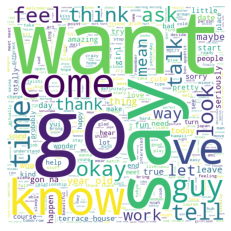

In [32]:
import wordcloud
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df['norm_for_pos'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("terrace_house_word_cloud.pdf", format = 'pdf')

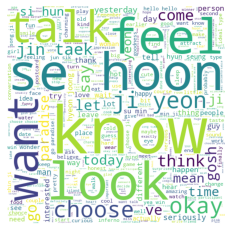

In [33]:
import wordcloud
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df_korean['norm_for_pos'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("single_inferno_word_cloud.pdf", format = 'pdf')

In [287]:
#classification approach
holdBackFraction = .2
train_data_df, test_data_df = sklearn.model_selection.train_test_split(df_com, test_size=holdBackFraction)

In [288]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=50, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [289]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [290]:
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

In [114]:
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.naive_bayes
import sklearn.svm


#Bayes
bayes = sklearn.naive_bayes.GaussianNB()

#Analogizes
svm_l = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
svm_p = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
k_n = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
log_reg = sklearn.linear_model.LogisticRegression()

#Symbolists
tree = sklearn.tree.DecisionTreeClassifier()
rand = sklearn.ensemble.RandomForestClassifier()

#Connectionists
mlp = sklearn.neural_network.MLPClassifier()

#Ensemble
grad = sklearn.ensemble.GradientBoostingClassifier()

name_dir = {
            bayes : 'Bayes',
            svm_l : 'linear SVM',
            svm_p : 'poly SVM',
            k_n : 'K neighbors',
            log_reg : 'Logistic Regression',
            tree : 'Decision tree',
            rand : 'Random Forest',
            mlp : 'MLP',
            grad : 'Gradient Boosting',
            }
lst_model = [bayes, svm_l, svm_p, k_n, log_reg, tree, rand, mlp, grad]

In [107]:
for model in lst_model:
  clf = model
  clf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
  print('The evaluation of ', name_dir[model])
  print(lucem_illud.evaluateClassifier(clf, test_data_df))
  print('----------------------------------------------------------------------------------')

The evaluation of  Bayes
                Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                             
Original               0.0  1.0        1.0                1.0     1.0
Karuizawa              0.0  1.0        1.0                1.0     1.0
single inferno         0.0  1.0        1.0                1.0     1.0
Aloha State            0.0  1.0        1.0                1.0     1.0
----------------------------------------------------------------------------------
The evaluation of  linear SVM
                Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                             
Original               0.0  1.0        1.0                1.0     1.0
Karuizawa              0.0  1.0        1.0                1.0     1.0
single inferno         0.0  1.0        1.0                1.0     1.0
Aloha State            0.0  1.0        1.0                1.0     1.0
----------------------

The plot of  Bayes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

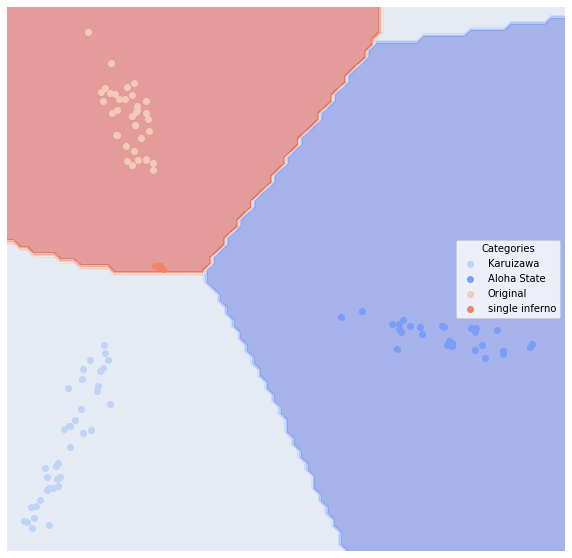

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

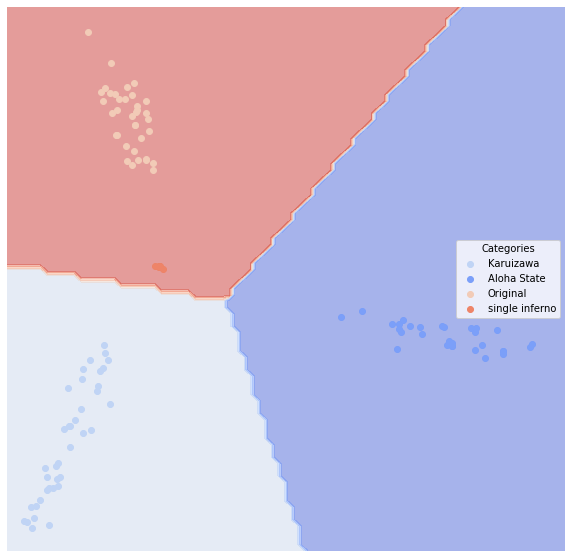

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

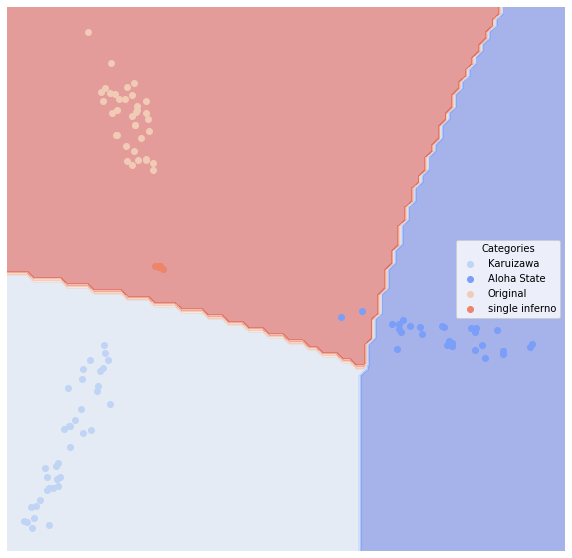

The plot of  K neighbors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

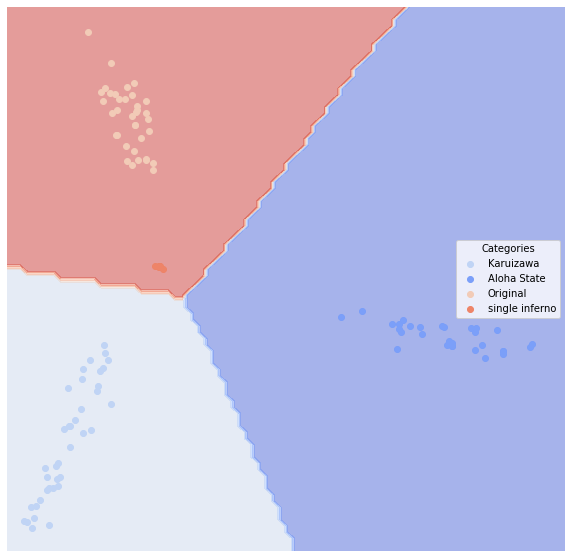

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

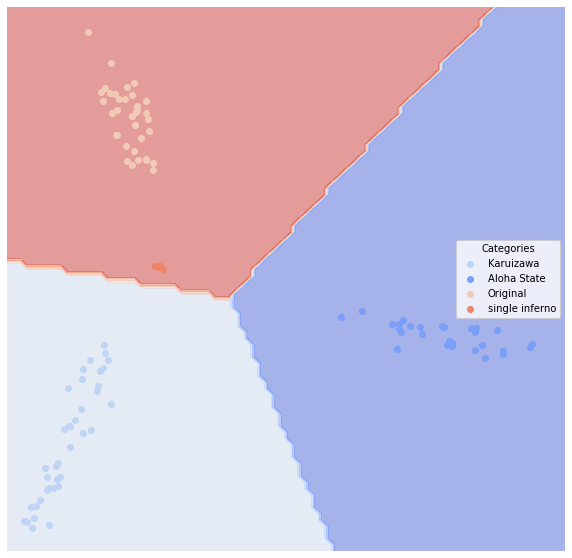

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

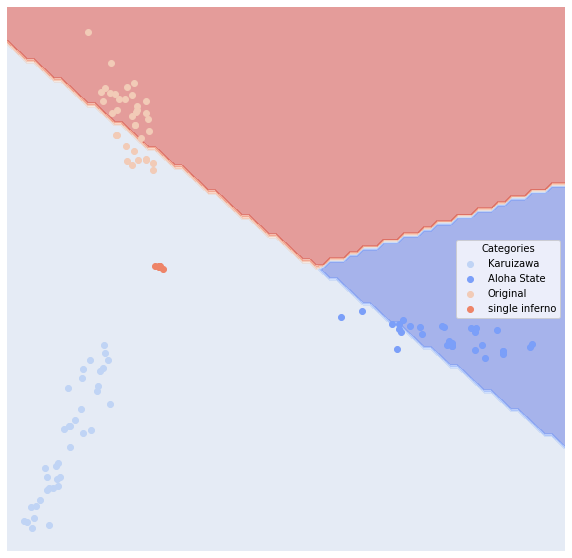

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

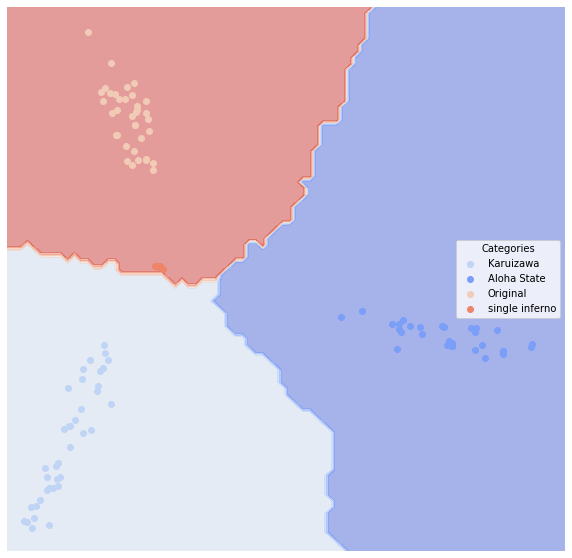

The plot of  MLP


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

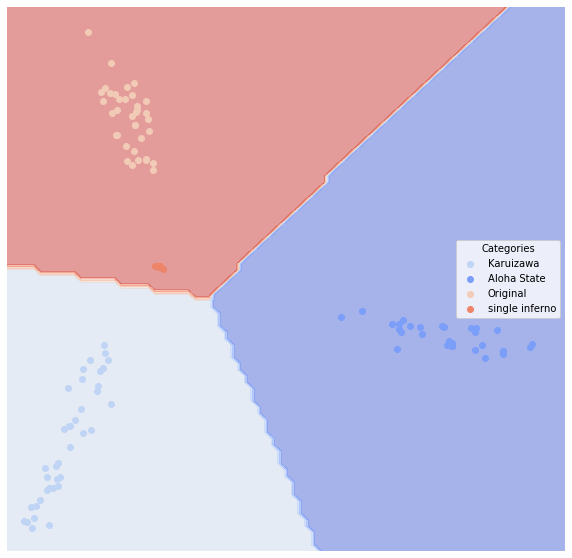

The plot of  Gradient Boosting


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

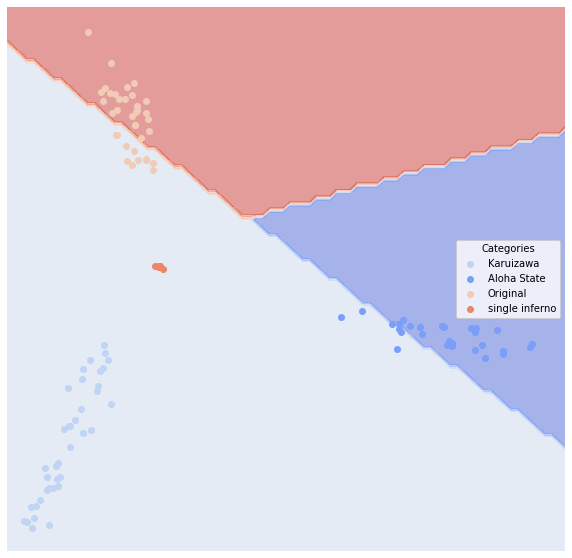

In [112]:

for model in lst_model:
    clf = model
    clf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
    print('The plot of ', name_dir[model])
    lucem_illud.plotregions(clf, train_data_df)

In [338]:
holdBackFraction = .2
train_data_df, test_data_df = sklearn.model_selection.train_test_split(df_com, test_size=holdBackFraction)

In [339]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=50, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['sents_for_clas'])

In [340]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [341]:
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

In [342]:
for model in lst_model:
  clf = model
  clf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
  print('The evaluation of ', name_dir[model])
  print(lucem_illud.evaluateClassifier(clf, test_data_df))
  print('----------------------------------------------------------------------------------')

The evaluation of  Bayes
                Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                                    
Karuizawa         0.285714  0.555556       1.00           0.396825  0.111111
Aloha State       0.285714  0.500000       0.00           0.285714  0.000000
Original          0.642857  0.571429       0.28           0.280000  1.000000
single inferno    0.071429  0.750000       1.00           0.571429  0.500000
----------------------------------------------------------------------------------
The evaluation of  linear SVM


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                                    
Karuizawa         0.035714  0.944444        1.0           0.924603  0.888889
Aloha State       0.142857  0.750000        1.0           0.642857  0.500000
Original          0.250000  0.833333        0.5           0.500000  1.000000
single inferno    0.071429  0.750000        1.0           0.571429  0.500000
----------------------------------------------------------------------------------
The evaluation of  poly SVM
                Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                                    
Karuizawa         0.571429  0.578947       0.36           0.360000  1.000000
Aloha State       0.285714  0.500000       0.00           0.285714  0.000000
Original          0.214286  0.571429       1.00           0.357143  0.142857
single inferno    0.071429  0.750000      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                                    
Karuizawa         0.071429  0.888889   1.000000           0.849206  0.777778
Aloha State       0.000000  1.000000   1.000000           1.000000  1.000000
Original          0.071429  0.952381   0.777778           0.777778  1.000000
single inferno    0.000000  1.000000   1.000000           1.000000  1.000000
----------------------------------------------------------------------------------
The evaluation of  Logistic Regression
                Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                                    
Karuizawa         0.035714  0.944444   1.000000           0.924603  0.888889
Aloha State       0.178571  0.687500   1.000000           0.553571  0.375000
Original          0.357143  0.761905   0.411765           0.411765  1.000000
single inferno    0.142857  0.5

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The evaluation of  Random Forest
                Error_Rate       AUC  Precision  Average_Precision  Recall
Category                                                                  
Karuizawa         0.000000  1.000000        1.0           1.000000   1.000
Aloha State       0.035714  0.937500        1.0           0.910714   0.875
Original          0.107143  0.928571        0.7           0.700000   1.000
single inferno    0.071429  0.750000        1.0           0.571429   0.500
----------------------------------------------------------------------------------
The evaluation of  MLP
                Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                                    
Karuizawa         0.035714  0.944444   1.000000           0.924603  0.888889
Aloha State       0.142857  0.750000   1.000000           0.642857  0.500000
Original          0.214286  0.857143   0.538462           0.538462  1.000000
single inferno    0.035714

The plot of  Bayes


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

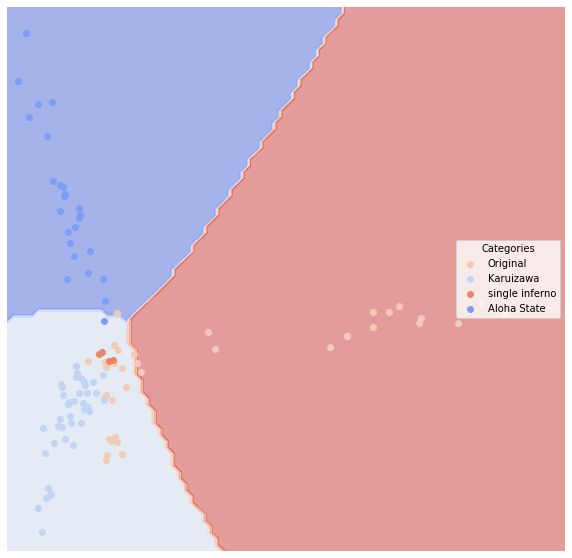

The plot of  linear SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

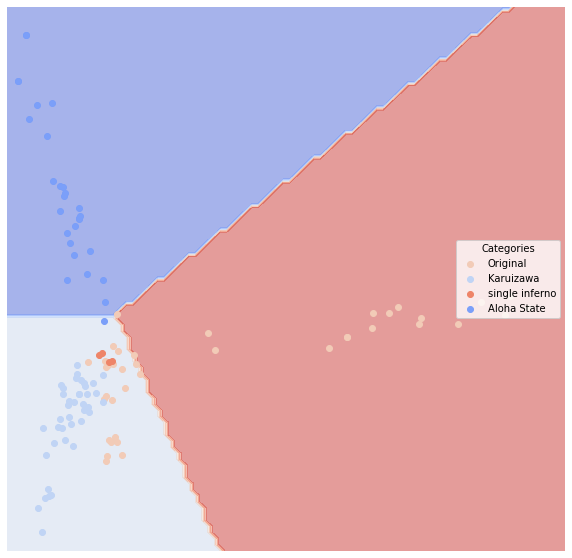

The plot of  poly SVM


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

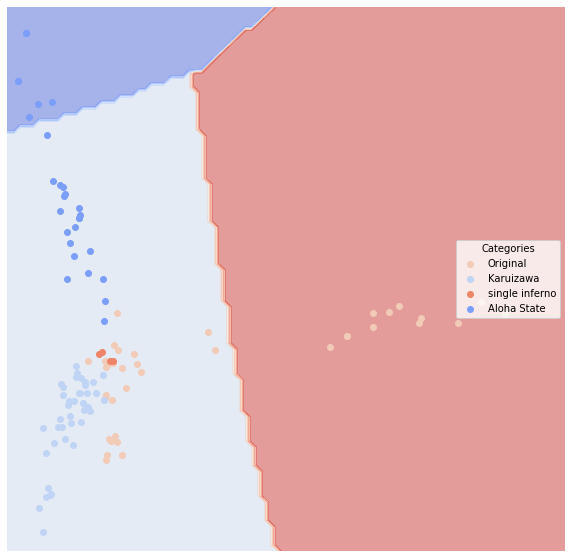

The plot of  K neighbors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

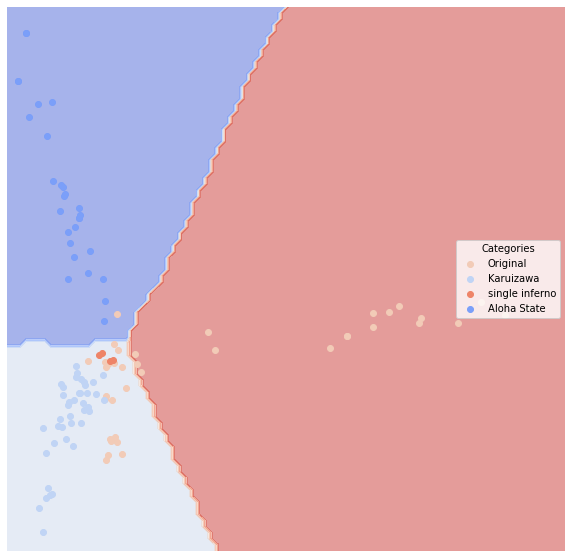

The plot of  Logistic Regression


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

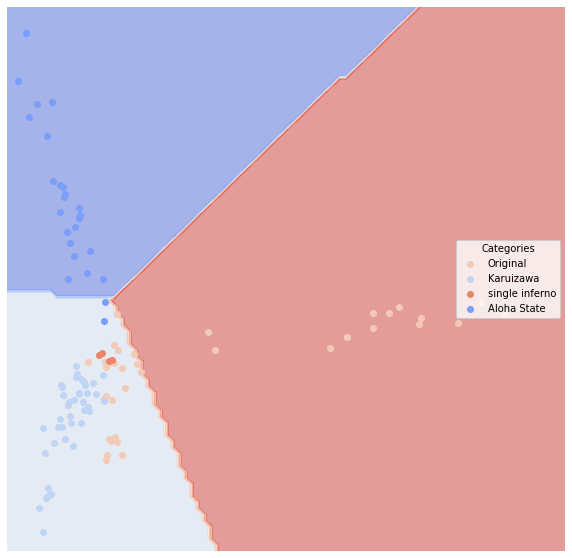

The plot of  Decision tree


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

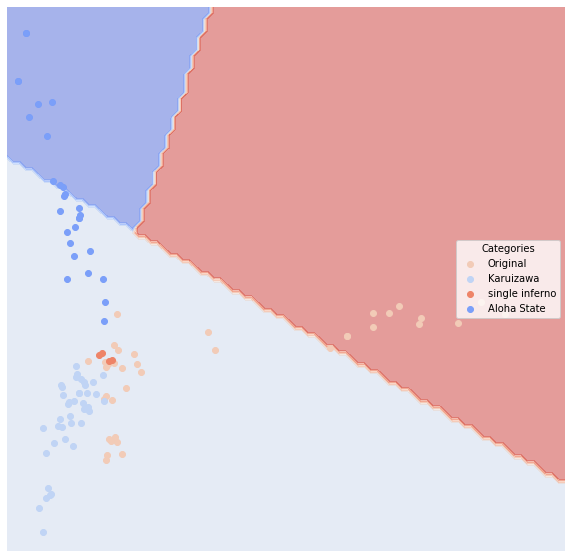

The plot of  Random Forest


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

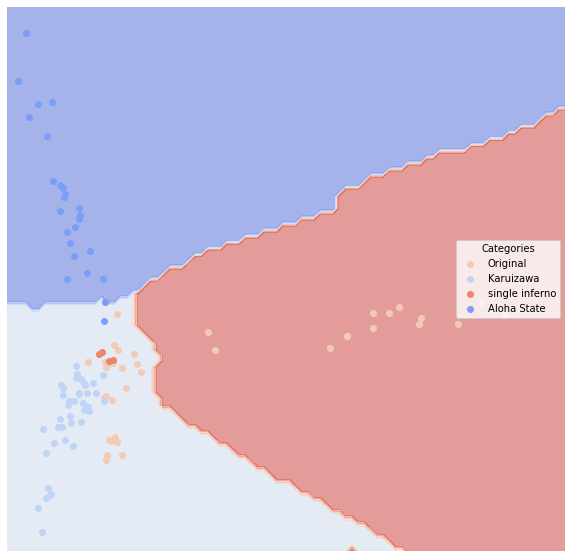

The plot of  MLP


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

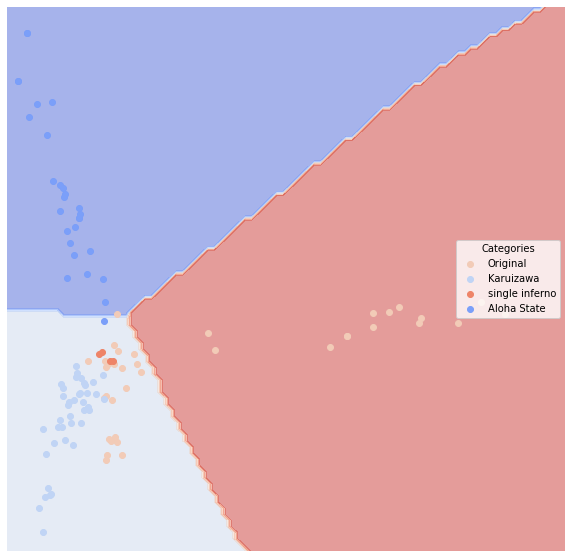

The plot of  Gradient Boosting


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

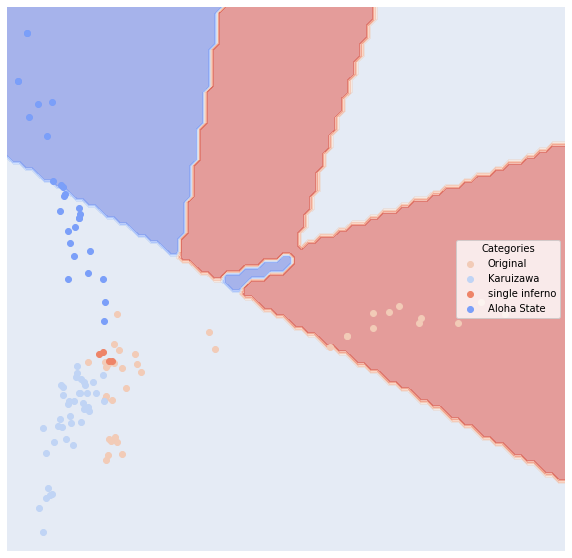

In [343]:

for model in lst_model:
    clf = model
    clf.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
    print('The plot of ', name_dir[model])
    lucem_illud.plotregions(clf, train_data_df)

In [120]:
#sentiment analysis
from transformers import pipeline
nlp = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [123]:
df_com['tokenized_sents'] = df_com['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
df_com['normalized_sents'] = df_com['tokenized_sents'].apply(lambda x:[lucem_illud.normalizeTokens(s) for s in x])

In [126]:
result_hw = {}
result_kr = {}
result_or = {}
result_korean = {}
flg = False
for n, season in enumerate(df_com['tokenized_sents']):
  if df_com['category'][n] == 'Aloha State':
    name = df_com['category'][n]+' '+str(n+1)
    result_hw[name] = []
    for txt in season:
      if len(txt) < 4:
        continue
      text = ''
      for i, cop in enumerate(txt):
        text+=cop
        if not i == len(txt)-1:
          text+=' '
      result_hw[name].append(text)
  if df_com['category'][n] == 'Karuizawa':
    name = df_com['category'][n]+' '+str(n+1)
    result_kr[name] = []
    for txt in season:
      if len(txt) < 4:
        continue
      text = ''
      for i, cop in enumerate(txt):
        text+=cop
        if not i == len(txt)-1:
          text+=' '
      result_kr[name].append(text)
  if df_com['category'][n] == 'Original':
    name = df_com['category'][n]+' '+str(n+1)
    result_or[name] = []
    for txt in season:
      if len(txt) < 4:
        continue
      text = ''
      for i, cop in enumerate(txt):
        text+=cop
        if not i == len(txt)-1:
          text+=' '
      result_or[name].append(text)
  if df_com['category'][n] == 'single inferno':
    name = df_com['category'][n]+' '+str(n+1)
    result_korean[name] = []
    for txt in season:
      if len(txt) < 4:
        continue
      text = ''
      for i, cop in enumerate(txt):
        text+=cop
        if not i == len(txt)-1:
          text+=' '
      result_korean[name].append(text)

In [128]:
import matplotlib.pyplot as plt
list_result = [result_hw, result_kr, result_or, result_korean]
lst_eval = []
for result in list_result:
  evaluation = {}
  first = 0
  for key, texts in result.items():
    pos = 0
    neg = 0
    n_pos = 0
    n_neg = 0
    for txt in texts:
      re = nlp(txt)[0]
      if re['score'] > 0.3:
        if re['label'] == 'NEGATIVE':
          n_neg += 1
          neg += re['score']
        if re['label'] == 'POSITIVE':
          n_pos += 1
          pos += re['score']
    
    evaluation[key]={'average':(pos/n_pos, neg/n_neg),
                    '(NEG/POS)/total sents':(n_pos/len(texts), n_neg/len(texts))
                    }
  lst_eval.append(evaluation)
  

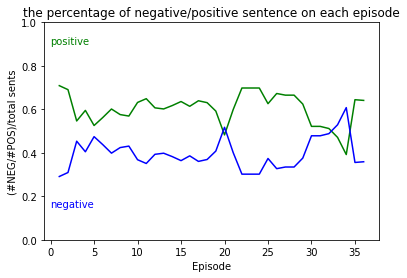

---------------------------------------------


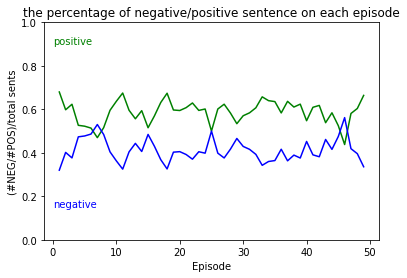

---------------------------------------------


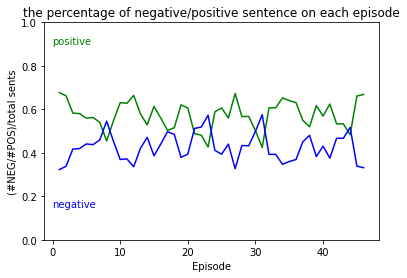

---------------------------------------------


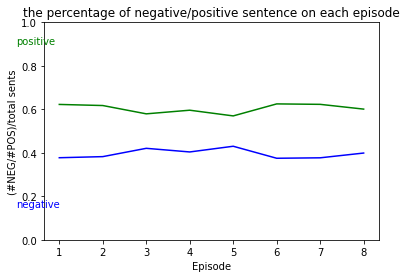

---------------------------------------------


In [129]:
for evaluation in lst_eval:  
  x = [i+1 for i in range(len(evaluation))]
  y = [i['(NEG/POS)/total sents'][0] for i in evaluation.values()]
  y2 = [i['(NEG/POS)/total sents'][1] for i in evaluation.values()]


  plt.ylim(0,1.0)
  plt.xlabel('Episode')
  plt.ylabel('(#NEG/#POS)/total sents')
  plt.title('the percentage of negative/positive sentence on each episode')
  plt.plot(x,y, color = 'green')
  plt.text(0, 0.90, 'positive', color = 'green')
  plt.plot(x,y2, color = 'blue')
  plt.text(0, 0.15, 'negative', color = 'blue')
  plt.show()
  print('---------------------------------------------')

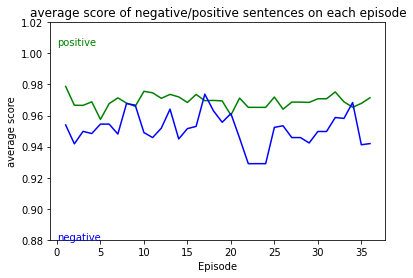

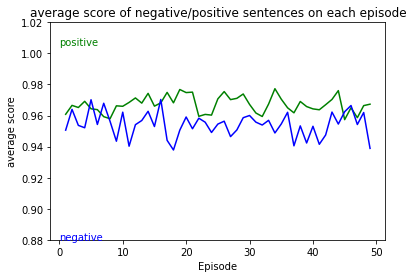

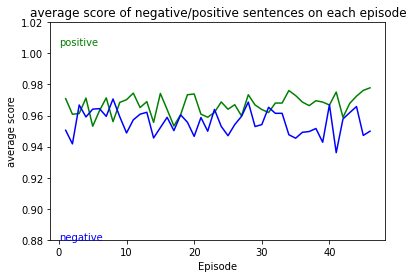

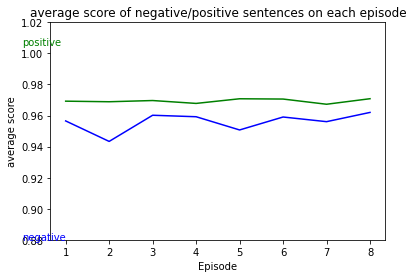

In [268]:
for evaluation in lst_eval:   
  x = [i+1 for i in range(len(evaluation))]
  y = [i['average'][0] for i in evaluation.values()]
  y2 = [i['average'][1] for i in evaluation.values()]


  plt.ylim(0.88,1.02)
  plt.xlabel('Episode')
  plt.ylabel('average score')
  plt.title('average score of negative/positive sentences on each episode')
  plt.plot(x,y, color = 'green')
  plt.text(0, 1.005, 'positive', color = 'green')
  plt.plot(x,y2, color = 'blue')
  plt.text(0, 0.88, 'negative', color = 'blue')
  plt.show()

In [344]:
#LDA on each season
thTFvectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.31, max_features=2000, min_df=1, stop_words='english', norm='l2')
thTFVects = thTFvectorizer.fit_transform(df_com['sents_for_clas'])


In [345]:
from gensim.models import HdpModel

In [346]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

In [347]:

df_com['reduced_tokens'] = df_com['norm_for_clas'].apply(lambda x: dropMissing(x, thTFvectorizer.vocabulary_.keys()))

In [348]:
dictionary = gensim.corpora.Dictionary(df_com['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in df_com['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

In [349]:
indices = []
n=1
for index, row in df_com.iterrows():
  if index.startswith('korean'):
    indices.append('hw'+index[6:])
  elif index.startswith('srt'):
    indices.append('korean_episode'+str(n))
    n+=1
  else:
    indices.append(index)

In [350]:
df_com['name'] = indices

In [352]:
sen1Bow = dictionary.doc2bow(df_com['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
ldaDF = pandas.DataFrame({
        'name' : df_com['name'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in df_com['reduced_tokens']]
    })

In [353]:
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [354]:
def plot_bar(ldaDFVis,ldaDFVisNames):
  N = 10
  ind = np.arange(N)
  K = senlda.num_topics  # N documents, K topics
  ind = np.arange(N)  # the x-axis locations for the novels
  width = 0.5  # the width of the bars
  plots = []
  height_cumulative = np.zeros(N)

  for k in range(K):
      color = plt.cm.coolwarm(k/K, 1)
      if k == 0:
          p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
      else:
          p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
      height_cumulative += ldaDFVis[:, k]
      plots.append(p)
      

  plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
  plt.ylabel('Topics')

  plt.title('Topics in Press Releases')
  plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

  plt.yticks(np.arange(0, 1, 10))
  topic_labels = ['Topic #{}'.format(k) for k in range(K)]
  plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

  plt.show()

In [355]:
ldaDF.loc['none'] = 0

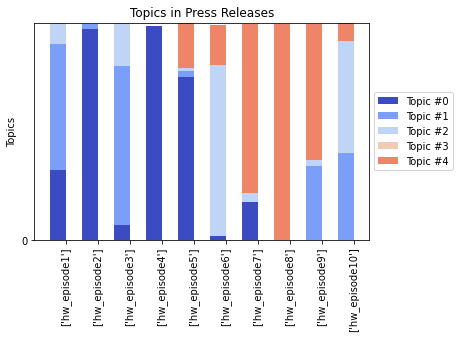

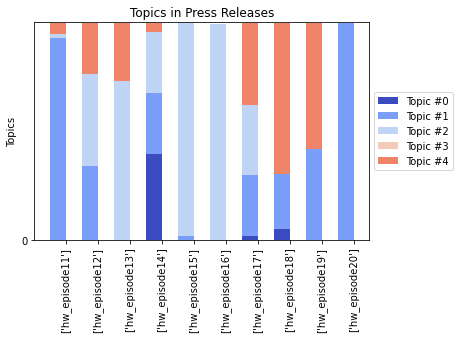

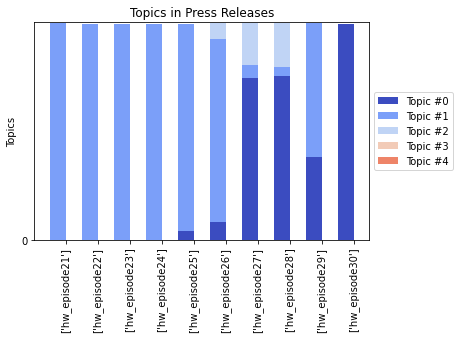

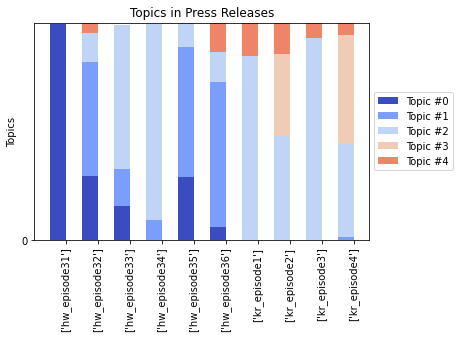

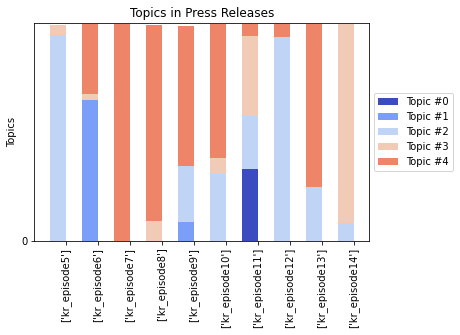

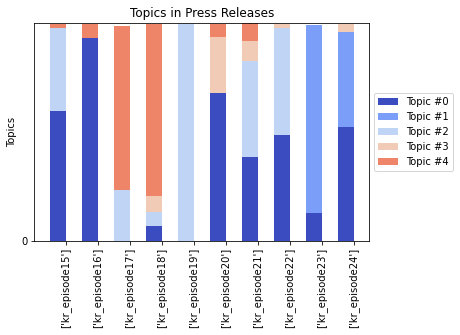

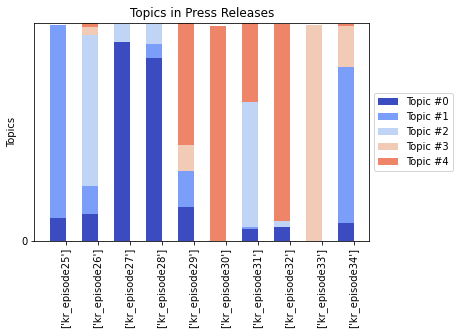

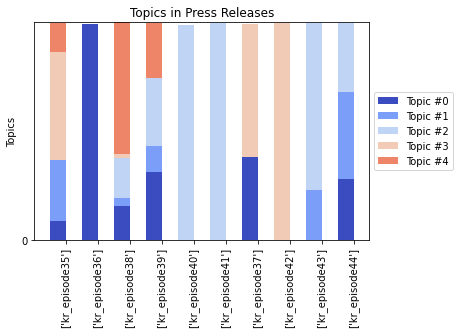

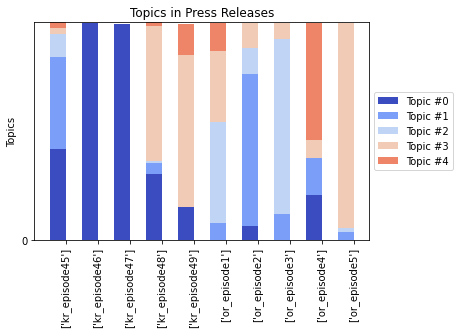

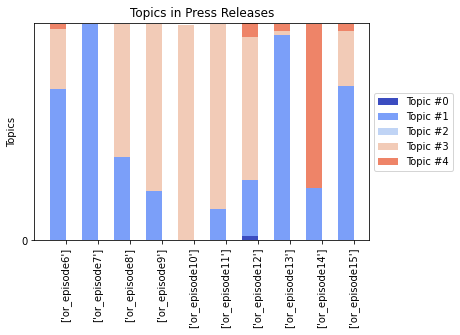

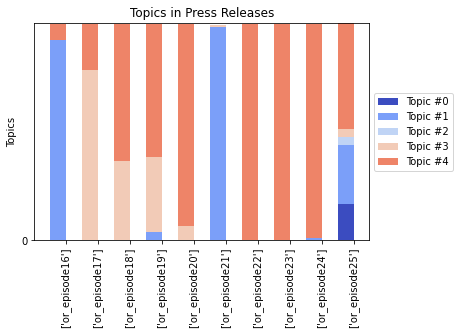

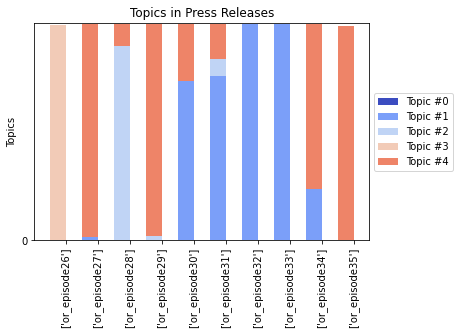

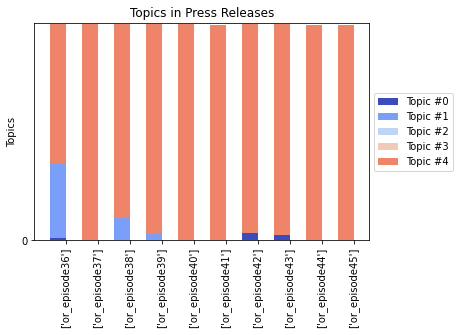

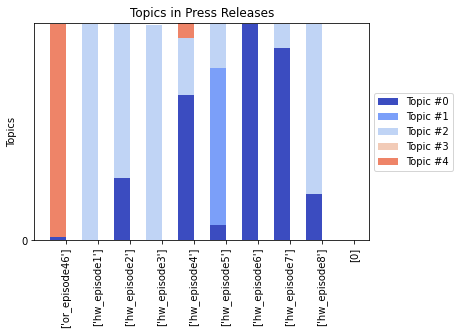

In [357]:
for i in range(14):
  ldaDFV = ldaDF[i*10:(i+1)*10][['topic_%d' %x for x in range(5)]]
  ldaDFVisN = ldaDF[i*10:(i+1)*10][['name']]
  ldaDFVis = ldaDFV.to_numpy()
  ldaDFVisNames = ldaDFVisN.to_numpy()
  plot_bar(ldaDFVis, ldaDFVisNames)

In [358]:
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,gosh,surf,birthday,birthday,meat
1,paradise,gosh,paradise,practice,riko
2,riko,insane,aio,christmas,hayato
3,aio,island,gosh,aio,birthday
4,team,riko,surf,tap,gosh
5,birthday,wez,glass,dish,mad
6,hayato,paradise,insane,ex,paradise
7,soba,park,dad,tatsuya,gift
8,park,makocchan,team,surf,christmas
9,meal,dish,inferno,makoto,rice


In [359]:
df_com

,text,category,tokens,norm_tokens,token_count,nm_count,norm_for_clas,sents_for_clas,reduced_tokens,name
hw_episode1,"Tonight, we start a new season in Hawaii. Terr...",Aloha State,"[Tonight, we, start, a, new, season, in, Hawai...","[tonight, start, new, season, hawaii, terrace,...",3905,1504,"[tonight, start, new, season, hawaii, terrace,...",tonight start new season hawaii terrace house ...,"[aloha, state, trip, confidence, yamachan, cen...",hw_episode1
hw_episode2,Terrace House: Aloha State has begun. Yes! The...,Aloha State,"[Terrace, House, Aloha, State, has, begun, Yes...","[terrace, house, aloha, state, begin, yes, hou...",3740,1452,"[terrace, house, aloha, state, begin, house, a...",terrace house aloha state begin house amazing ...,"[aloha, state, pool, large, large, slowly, tsa...",hw_episode2
hw_episode3,I'm certain you've noticed that Torichan is no...,Aloha State,"[I, 'm, certain, you, 've, noticed, that, Tori...","[be, certain, have, notice, torichan, today, p...",3330,1217,"[m, certain, ve, notice, torichan, today, prio...",m certain ve notice torichan today prior engag...,"[certain, book, theater, theater, suggest, com...",hw_episode3
hw_episode4,Torichan is at a very important job once again...,Aloha State,"[Torichan, is, at, a, very, important, job, on...","[torichan, important, job, week, today, day, y...",3073,1157,"[torichan, important, job, week, today, day, e...",torichan important job week today day easily t...,"[bear, dress, nicely, bore, bore, kill, choice...",hw_episode4
hw_episode5,"Last time, there was the surfing issue... Laur...",Aloha State,"[Last, time, there, was, the, surfing, issue, ...","[time, surf, issue, lauren, avian, talk, eric,...",3838,1414,"[time, surfing, issue, talk, issue, solve, wes...",time surfing issue talk issue solve western st...,"[surfing, solve, western, short, piece, fan, y...",hw_episode5
...,...,...,...,...,...,...,...,...,...,...
korean_episode4,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Hyeon...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, INF...","[yea, win, song, ji, oh, jin, taek, inferno, h...",7435,2629,"[inferno, go, work, let, go, play, catch, awes...",inferno go work let go play catch awesome bye ...,"[inferno, awesome, runner, runner, island, cru...",hw_episode4
korean_episode5,AN YEA-WON SONG JI-A OH JIN-TAEK INFERNO Time ...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, INF...","[yea, win, song, ji, oh, jin, taek, inferno, t...",7473,2695,"[inferno, time, fly, evening, wait, need, shoe...",inferno time fly evening wait need shoe wo lon...,"[inferno, fly, shoe, white, gosh, seat, bright...",hw_episode5
korean_episode6,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, KIM...","[yea, win, song, ji, oh, jin, taek, kim, su, m...",7261,2936,"[hold, okay, dolphin, pass, gosh, feel, like, ...",hold okay dolphin pass gosh feel like m way he...,"[pass, gosh, heaven, casually, middle, pressur...",hw_episode6
korean_episode7,AN YEA-WON SONG JI-A OH JIN-TAEK KIM SU-MIN SE...,single inferno,"[AN, YEA, WON, SONG, JI, A, OH, JIN, TAEK, KIM...","[yea, win, song, ji, oh, jin, taek, kim, su, m...",9108,3776,"[choose, gosh, get, goosebump, m, impress, adm...",choose gosh get goosebump m impress admire gos...,"[gosh, goosebump, impress, admire, gosh, goose...",hw_episode7


In [371]:
#see lda on each season
lst_season = ['Aloha State', 'Karuizawa', 'Original','single inferno']
str_hw = ''
lst_hw = []
str_kr = ''
lst_kr = []
str_or = ''
lst_or = []
str_korean = ''
lst_korean = []
for ind, row in df_com.iterrows():
  if row['category']== lst_season[0]:
    str_hw+=row['sents_for_clas']
    str_hw+= ' '
    lst_hw.extend(row['norm_for_clas'])
  if row['category']== lst_season[1]:
    str_kr+=row['sents_for_clas']
    str_kr+= ' '
    lst_kr.extend(row['norm_for_clas'])
  if row['category']== lst_season[2]:
    str_or+=row['sents_for_clas']
    str_or+= ' '
    lst_or.extend(row['norm_for_clas'])
  if row['category']== lst_season[3]:
    str_korean+=row['sents_for_clas']
    str_korean+= ' '
    lst_korean.extend(row['norm_for_clas'])
norm_season = [lst_hw,lst_kr,lst_or,lst_korean]
str_season = [str_hw,str_kr,str_or,str_korean]

df_season = pd.DataFrame({'sents_for_clas': str_season, 'norm_for_clas':norm_season}, index = lst_season)

In [370]:
df_season

,norm_for_clas,sents_for_clas
Aloha State,tonight start new season hawaii terrace house ...,"[tonight, start, new, season, hawaii, terrace,..."
Karuizawa,tonight finally begin new season set karuizawa...,"[tonight, finally, begin, new, season, set, ka..."
Original,usual script terrace house revive netflix wow ...,"[usual, script, terrace, house, revive, netfli..."
single inferno,manage escape inferno paradise paradise fantas...,"[manage, escape, inferno, paradise, paradise, ..."


In [374]:
thTFvectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.31, max_features=2000, min_df=1, stop_words='english', norm='l2')
thTFVects = thTFvectorizer.fit_transform(df_season['sents_for_clas'])

df_season['reduced_tokens'] = df_season['norm_for_clas'].apply(lambda x: dropMissing(x, thTFvectorizer.vocabulary_.keys()))


In [375]:
dictionary = gensim.corpora.Dictionary(df_season['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in df_season['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

In [376]:
sen1Bow = dictionary.doc2bow(df_season['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
ldaDF = pandas.DataFrame({
        'name' : [a for a,s in df_season.iterrows()],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in df_season['reduced_tokens']]
    })

In [377]:
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [384]:

ldaDFV = ldaDF[0:4][['topic_%d' %x for x in range(5)]]
ldaDFVisN = ldaDF[0:4][['name']]
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()

In [380]:
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
0,inferno,karuizawa,makocchan,wez,karuizawa
1,participant,aio,makoto,nakajima,aio
2,karuizawa,hockey,karuizawa,mila,makoto
3,aio,takayuki,bitaraf,karuizawa,bitaraf
4,postcard,snowboarder,nakada,estate,hockey
5,hockey,waterfall,aquarium,chika,makocchan
6,takayuki,noguchi,aio,tamaki,uchihara
7,snowboarder,konnyaku,yuuki,makoto,nakada
8,cap,tanaka,uchihara,shibusawa,takayuki
9,doenjang,3rd,ballet,uchihara,wez


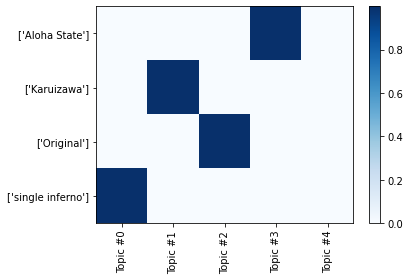

In [383]:
topic_labels = ['Topic #{}'.format(k) for k in range(senlda.num_topics)]
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()